# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Todesfälle bei Kindern aufgrund von Krankheiten, die durch invasive Pneumokokken verursacht werden, weltweit"
### 1.2 Fragestellungen:
- "Wie haben sich die Todesfälle durch Pneumokokken-bedingte Pneumonie, Meningitis und andere invasive Krankheiten weltweit zwischen 2000 und 2003 verändert?"   
- "Welcher prozentuale Anteil der Todesfälle durch invasive Pneumokokken-Erkrankungen entfiel im Jahr 2000 und 2003 jeweils auf Pneumonie, Meningitis und andere Krankheiten?"
- "In welchem Jahr, von 2000 bis 2003, wurde der grösste Rückgang bei den Todesfällen durch Pneunokokken-bedingte Krankheiten weltweit beobachtet?"
### 1.3 Datenquelle(n):
- https://ourworldindata.org/pneumonia 




### 1.4 Daten beschaffen und laden

In [32]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
# lade hier deine Daten
df_orig = pd.read_csv("child-deaths-from-streptococcus-by-disease.csv")
df_orig.head()

,Entity,Code,Year,Streptococcus non-pneumonia-non-meningitis deaths (aged under-5),Streptococcus meningitis deaths (aged under-5),Streptococcus pneumonia deaths (aged under-5)
0,Afghanistan,AFG,2000,499,1588,8257
1,Afghanistan,AFG,2001,508,1617,8415
2,Afghanistan,AFG,2002,510,1622,8520
3,Afghanistan,AFG,2003,510,1623,8598
4,Afghanistan,AFG,2004,506,1609,8603


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format vorhanden.
- Für die Analyse werden die Roh-Daten pivotiert: Jede Spalte repräsentiert eine Kategorie der Todesfälle (z. B.Pneumonie, Meningitis, invasive nicht-Pneumonie), und die Zeilen sind die verschiedenen Jahre in aufsteigender Reihenfolge. 

In [34]:
df_pivot = df_orig.pivot_table(index='Entity', columns='Year', values=["Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)", "Streptococcus meningitis deaths (aged under-5)", "Streptococcus pneumonia deaths (aged under-5)" ])
df_pivot.head()

Streptococcus meningitis deaths (aged under-5)                  \
Year                                                  2000    2001    2002   
Entity                                                                       
Afghanistan                                         1588.0  1617.0  1622.0   
Albania                                                5.0     4.0     4.0   
Algeria                                              107.0   102.0    97.0   
Andorra                                                0.0     0.0     0.0   
Angola                                              1305.0  1322.0  1369.0   

                                                                     ...  \
Year           2003    2004    2005    2006    2007    2008    2009  ...   
Entity                                                               ...   
Afghanistan  1623.0  1609.0  1579.0  1553.0  1511.0  1462.0  1407.0  ...   
Albania         3.0     3.0     2.0     2.0     2.0     2.0     3.0  ...   
Algeria        92.0    90.0    88.0    88.0    89.0    91.0    93.0  ...   
Andorra         0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...   
Angola       1381.0  1393.0  1418.0  1444.0  1464.0  1484.0  1487.0  ...   

            Streptococcus pneumonia deaths (aged under-5)                    \
Year                                                 2006     2007     2008   
Entity                                                                        
Afghanistan                                        8493.0   8394.0   8267.0   
Albania                                              30.0     26.0     23.0   
Algeria                                             901.0    908.0    930.0   
Andorra                                               0.0      0.0      0.0   
Angola                                            11687.0  12096.0  12432.0   

                                                                           
Year            2009     2010     2011     2012     2013     2014    2015  
Entity                                                                     
Afghanistan   8113.0   7920.0   7663.0   7369.0   7046.0   5496.0  4199.0  
Albania         23.0     23.0     14.0     12.0     11.0     11.0     9.0  
Algeria        941.0    950.0    956.0    969.0    978.0    974.0   972.0  
Andorra          0.0      0.0      0.0      0.0      0.0      0.0     0.0  
Angola       12606.0  12681.0  12611.0  12462.0  11867.0  10033.0  8704.0  

[5 rows x 48 columns]

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*



- Die Spalte "Entity" enthält 195 verschiedene Entitys 
- Der Graph zeigt, dass die Regionen "Nord" und "Süd" mit jeweils 3 Einträgen die meisten Datenpunkte aufweisen, während die Regionen "Ost" und "West" mit jeweils 2 Einträgen weniger vertreten sind.

- Die Spalte "Code" enthält 4 verschiedene Codes.
- Die Grafik zeigt die Verteilung der Einträge pro Code, wobei die Codes "N" und "S" jeweils 30 % der Gesamtanzahl ausmachen, während "O" und "W" jeweils 20 % der Einträge ausmachen.

- Die Daten umfassen den Zeitraum von 2000 bis 2015, wobei der Fokus auf den vier Jahren von 2000 bis einschließlich 2003 liegt.
- Die Grafik zeigt die Anzahl der Einträge pro Jahr, wobei im Jahr 2000 mit 4 Einträgen die höchste und im Jahr 2001 mit 2 Einträgen die niedrigste Anzahl verzeichnet wurde, gefolgt von einem Anstieg im Jahr 2002 und einem erneuten Rückgang im Jahr 2003. 

- Die Daten beziehen sich auf drei Krankheiten: Todesfälle durch Streptococcus non-pneumonia-non-meningitis (unter 5 Jahren), Streptococcus meningitis (unter 5 Jahren) und Streptococcus pneumonia (unter 5 Jahren). 
- Der Graph zeigt, dass die meisten Todesfälle bein Kindern unter 5 Jahren durch nicht-pneumonische, nicht-meningitische Infektionen verursacht werden, gefolt von Pneumonie und Meningitis. 

In [104]:
df.dtypes

Entity                                                              object
Code                                                                object
Year                                                                 int64
Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)     int64
Streptococcus meningitis deaths (aged under-5)                       int64
Streptococcus pneumonia deaths (aged under-5)                        int64
dtype: object

# 3.1 Analyse Entity

In [65]:
print('Anzahl verschiedener Entity:', len(df_orig['Entity'].unique()))

Anzahl verschiedener Entity: 195


In [66]:
df_orig['Entity'].value_counts()

Entity
Afghanistan    16
Saint Lucia    16
Nicaragua      16
Niger          16
Nigeria        16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: count, Length: 195, dtype: int64

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]
}
df = pd.DataFrame(data)


In [74]:
entity_counts = df['Entity'].value_counts()

<Axes: title={'center': 'Häufigkeit der Einträge pro Entity'}, xlabel='Entity', ylabel='Anzahl der Einträge'>

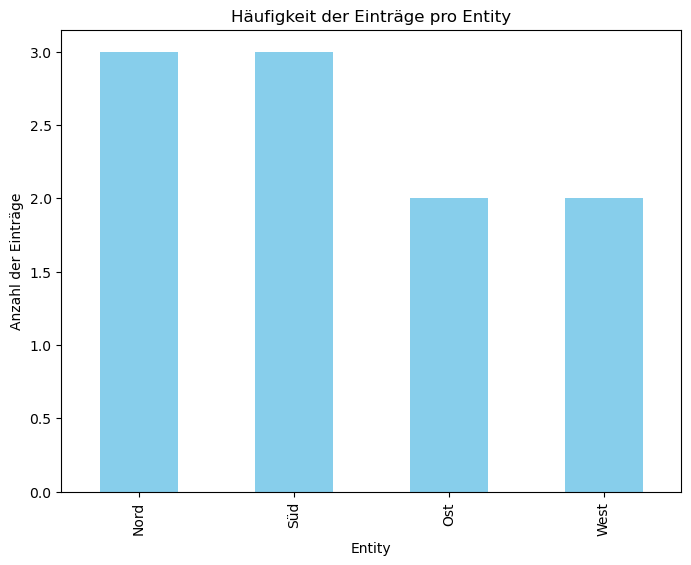

In [75]:
entity_counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(8, 6),
    ylabel='Anzahl der Einträge',
    title='Häufigkeit der Einträge pro Entity')

# 3.2 Analyse Code

In [83]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  4


In [84]:
df['Code'].value_counts()

Code
N    3
S    3
O    2
W    2
Name: count, dtype: int64

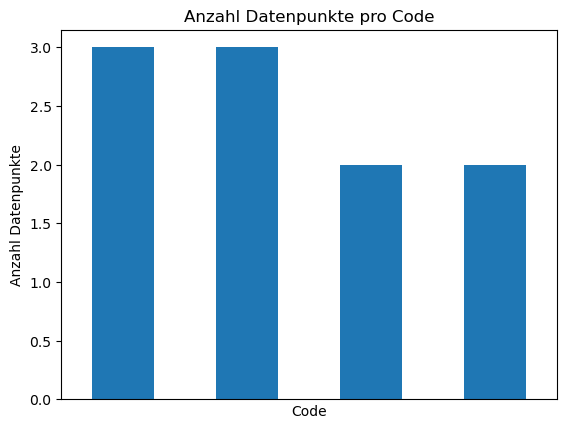

In [85]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
code_counts = df['Code'].value_counts()

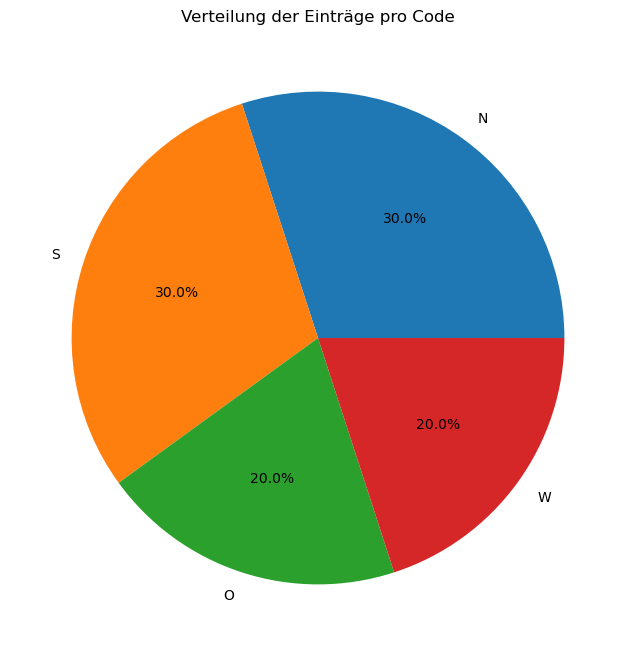

In [72]:
code_counts.plot(
    kind='pie',
    autopct='%1.1f%%', figsize=(8, 8), title='Verteilung der Einträge pro Code', ylabel='')
plt.show()

# 3.3 Analyse Year

In [87]:
print('Anzahl verschiedener Years: ', len(df['Year'].unique()))

Anzahl verschiedener Years:  4


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
data = df_orig 
df = pd.DataFrame(data)
year_counts = df['Year'].value_counts().sort_index()



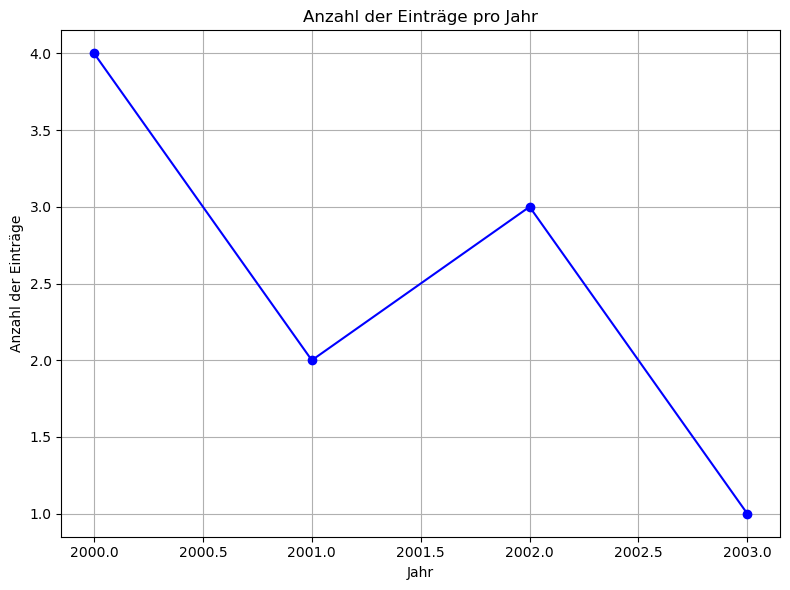

In [80]:
year_counts.plot(
    kind='line', marker='o', color='blue', figsize=(8, 6), ylabel='Anzahl der Einträge', xlabel='Jahr', title='Anzahl der Einträge pro Jahr')
plt.grid(True)  
plt.tight_layout()
plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
year_counts = df['Year'].value_counts().sort_index()

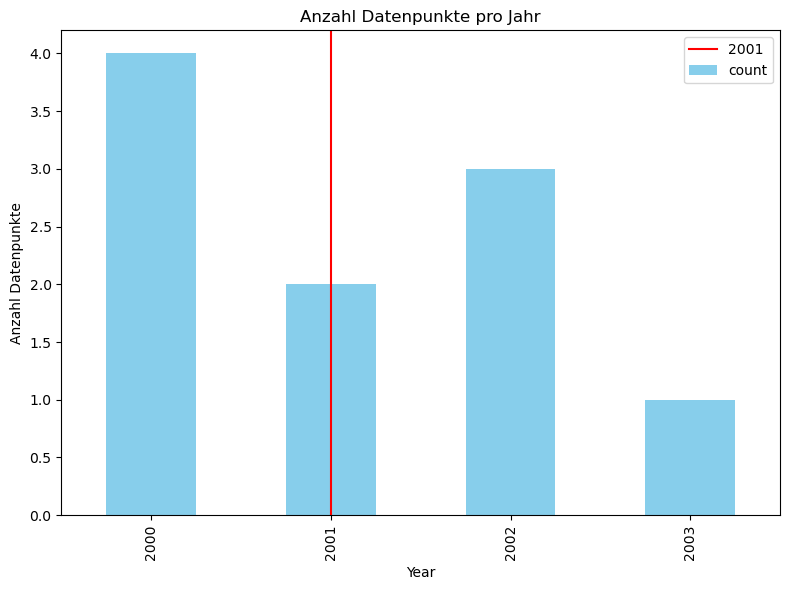

In [96]:
g = year_counts.plot(
    kind='bar', ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr', figsize=(8, 6), color='skyblue')
g.axvline(x=year_counts.index.get_loc(2001), color='red', label='2001')  # Linie bei 2001
g.legend()
plt.tight_layout()
plt.show()

##### 3.4 Analyse Krankheiten Streptococcus non-pneumonia-non-meningitis deaths (aged under-5), Streptococcus meningitis deaths (aged under-5), Streptococcus pneumonia deaths (aged under-5)

In [99]:
df.describe()

,Year,Streptococcus non-pneumonia-non-meningitis deaths (aged under-5),Streptococcus meningitis deaths (aged under-5),Streptococcus pneumonia deaths (aged under-5)
count,10.000000,10.000000,10.00000,10.000000
mean,2001.100000,13.800000,4.50000,10.200000
std,1.100505,5.846176,1.95789,4.315347
min,2000.000000,5.000000,2.00000,4.000000
25%,2000.000000,10.000000,3.00000,7.250000
50%,2001.000000,13.500000,4.00000,9.500000
75%,2002.000000,18.750000,5.75000,12.750000
max,2003.000000,22.000000,8.00000,18.000000


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
totals = df[
    ['Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)','Streptococcus meningitis deaths (aged under-5)','Streptococcus pneumonia deaths (aged under-5)']].sum()


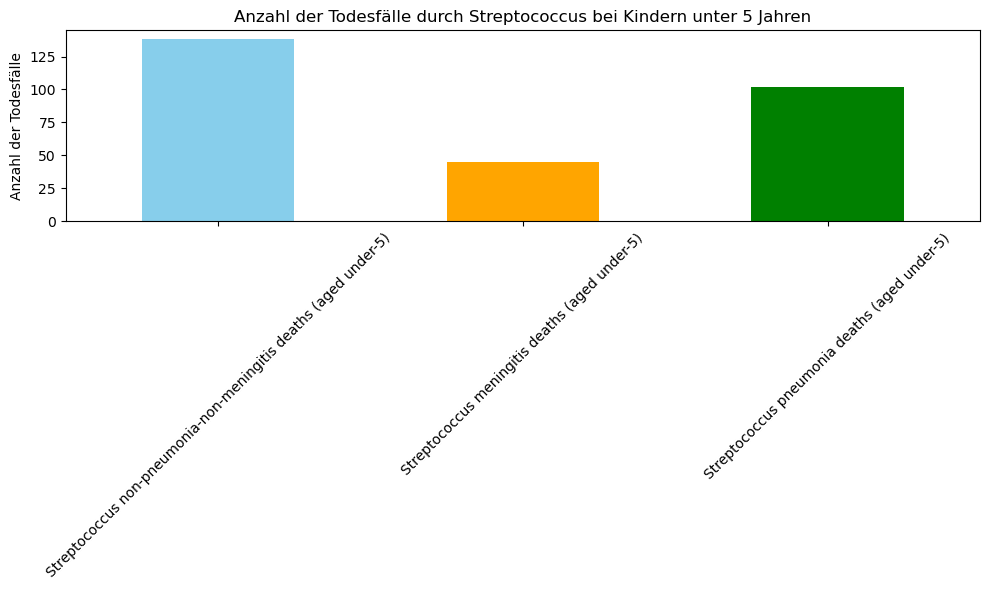

In [102]:
totals.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'], ylabel='Anzahl der Todesfälle', title='Anzahl der Todesfälle durch Streptococcus bei Kindern unter 5 Jahren')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.5 Analyse Roh-Daten 

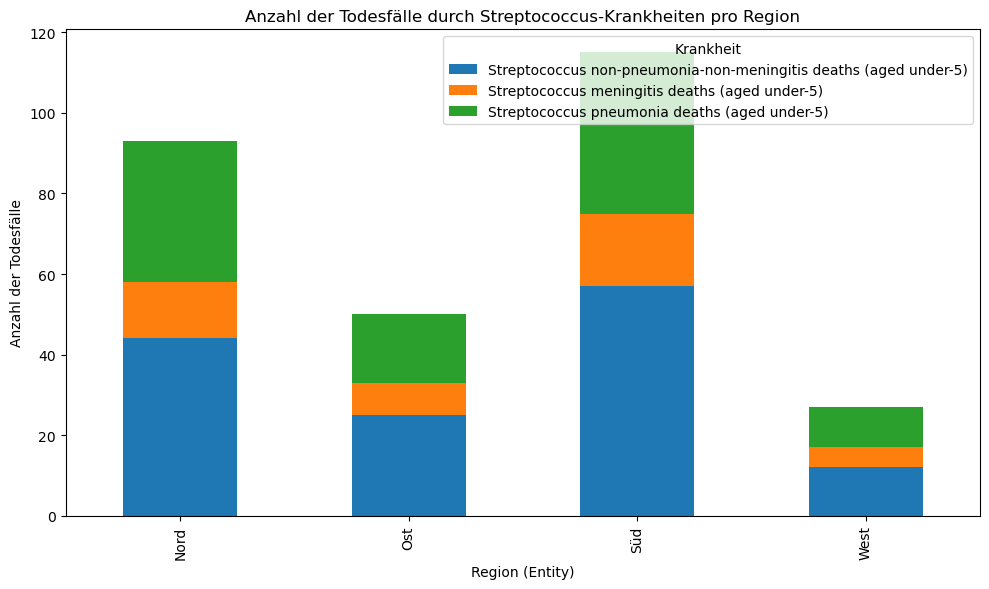

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
df_grouped = df.groupby('Entity').sum(numeric_only=True)
df_grouped[['Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)',
            'Streptococcus meningitis deaths (aged under-5)',
            'Streptococcus pneumonia deaths (aged under-5)']].plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Anzahl der Todesfälle durch Streptococcus-Krankheiten pro Region')
plt.ylabel('Anzahl der Todesfälle')
plt.xlabel('Region (Entity)')
plt.legend(title='Krankheit')
plt.tight_layout()
plt.show()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



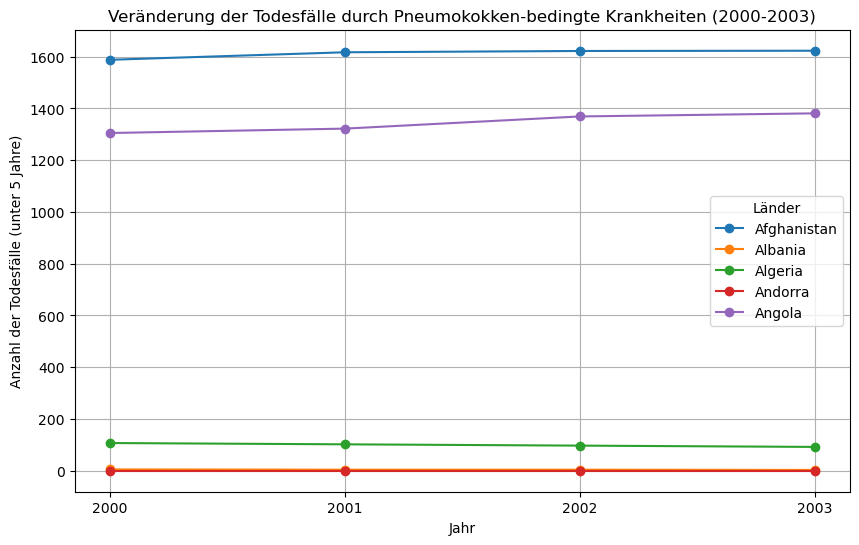

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Entity': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
    '2000': [1588, 5, 107, 0, 1305],
    '2001': [1617, 4, 102, 0, 1322],
    '2002': [1622, 4, 97, 0, 1369],
    '2003': [1623, 3, 92, 0, 1381]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    plt.plot(['2000', '2001', '2002', '2003'], row[1:], marker='o', label=row['Entity'])

plt.title('Veränderung der Todesfälle durch Pneumokokken-bedingte Krankheiten (2000-2003)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Todesfälle (unter 5 Jahre)')
plt.legend(title='Länder')
plt.grid()

plt.show()

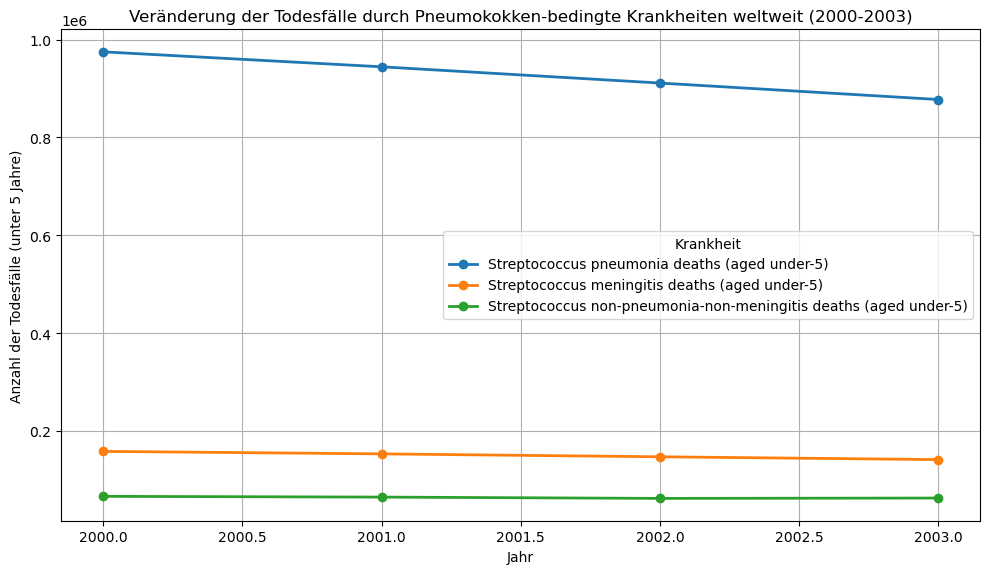

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dateipfad = 'child-deaths-from-streptococcus-by-disease.csv'
df = pd.read_csv(dateipfad)

jahre = [2000, 2001, 2002, 2003]
krankheiten = [
    "Streptococcus pneumonia deaths (aged under-5)",
    "Streptococcus meningitis deaths (aged under-5)",
    "Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)"]

df_filtered = df[df['Year'].isin(jahre)]
summen = df_filtered.groupby('Year')[krankheiten].sum()

plt.figure(figsize=(10, 6))

for krankheit in krankheiten:
    plt.plot(summen.index, summen[krankheit], label=krankheit, marker='o', linewidth=2)

plt.title('Veränderung der Todesfälle durch Pneumokokken-bedingte Krankheiten weltweit (2000-2003)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Todesfälle (unter 5 Jahre)')
plt.legend(title='Krankheit')
plt.grid(True)

plt.tight_layout()
plt.show()

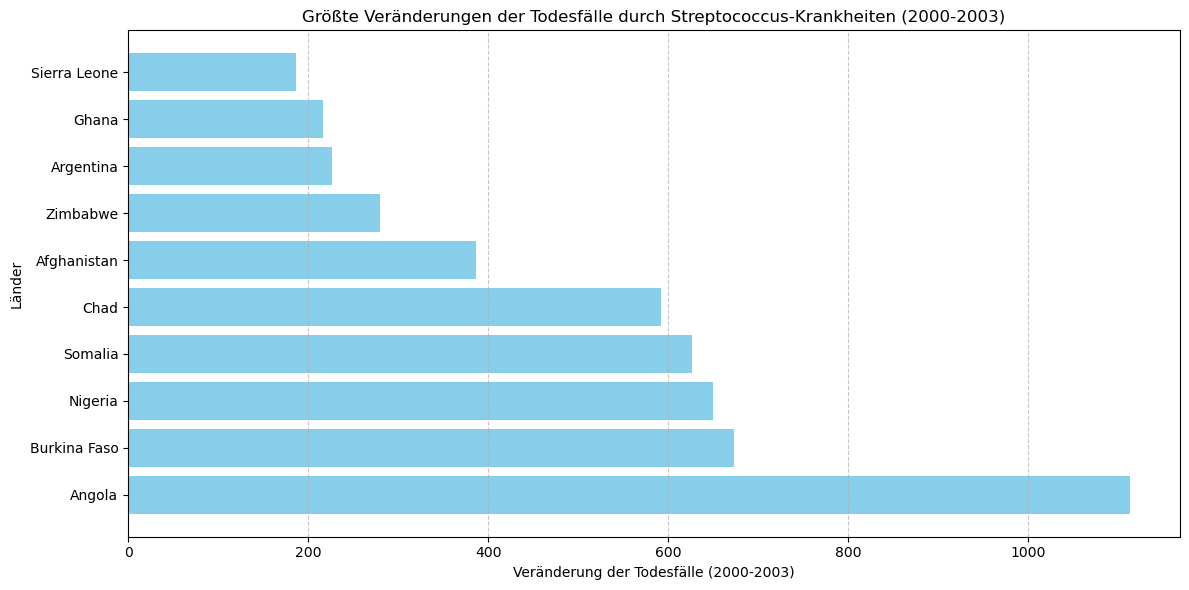

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("child-deaths-from-streptococcus-by-disease.csv")

# Daten filtern für die relevanten Jahre und Spalten
jahre = ['2000', '2003']
df_filtered = df[df['Year'].isin([2000, 2003])]
df_pivot = df_filtered.pivot_table(
    index='Entity',
    columns='Year',
    values=[
        "Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)",
        "Streptococcus meningitis deaths (aged under-5)",
        "Streptococcus pneumonia deaths (aged under-5)"
    ]
)

# Veränderung zwischen 2000 und 2003 berechnen
df_pivot['Total_2000'] = df_pivot.xs(2000, axis=1, level='Year').sum(axis=1)
df_pivot['Total_2003'] = df_pivot.xs(2003, axis=1, level='Year').sum(axis=1)
df_pivot['Change'] = df_pivot['Total_2003'] - df_pivot['Total_2000']

# Top 10 Länder mit den größten Veränderungen
df_top_changes = df_pivot[['Change']].sort_values(by='Change', ascending=False).head(10)

# Grafik erstellen
plt.figure(figsize=(12, 6))
plt.barh(df_top_changes.index, df_top_changes['Change'], color='skyblue')
plt.xlabel('Veränderung der Todesfälle (2000-2003)')
plt.ylabel('Länder')
plt.title('Größte Veränderungen der Todesfälle durch Streptococcus-Krankheiten (2000-2003)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 


In [ ]:
ddd